<a href="https://colab.research.google.com/github/augustofarias2/Practica/blob/master/Clase_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


---
Termo
---

In [ ]:
termo = [f"/content/drive/MyDrive/Computer_vision/termo_{i}.jpg" for i in range(1,6)]
termo_mate = ["/content/drive/MyDrive/Computer_vision/termo_mate_1.jpg", "/content/drive/MyDrive/Computer_vision/termo_mate_2.jpg"]
termo_mate_yerbero = ["/content/drive/MyDrive/Computer_vision/termo_my_1.jpg", "/content/drive/MyDrive/Computer_vision/termo_my_2.jpg"]

In [ ]:
import cv2
import matplotlib.pyplot as plt
i=1
for input_path in termo:
  # Read the input image in BGR format
  input_image = cv2.imread(input_path)

  # Convert the image from BGR to RGB color space
  rgb_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

  # Save the converted image as a PNG file
  cv2.imwrite(f"/content/drive/MyDrive/Computer_vision/termo_mate_{i}.png", rgb_image)
  i+=1

  #image = cv2.imread(rgb_image)
  #print(rgb_image + "\n")
  print(rgb_image)
  #plt.imshow(image)
  #plt.show


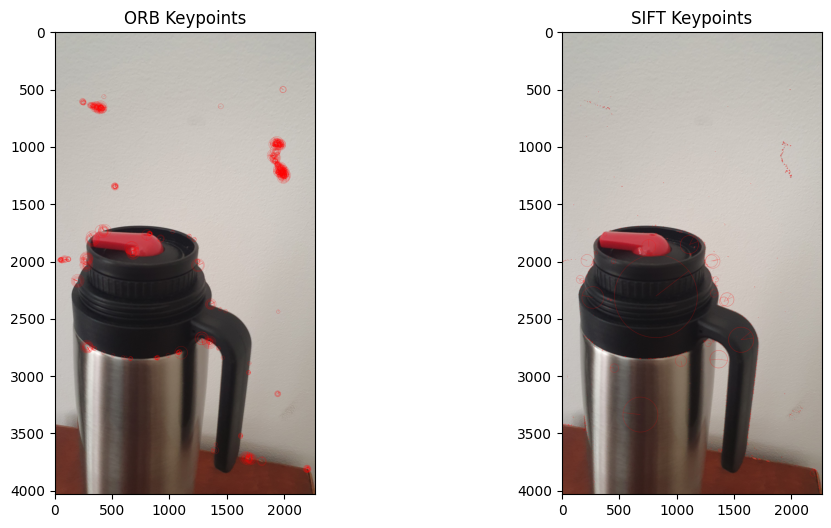

In [ ]:

orb = cv2.ORB_create()
keypoints_orb = orb.detect(input_image, None)
image_with_orb_keypoints = cv2.drawKeypoints(rgb_image, keypoints_orb, None, color=(255, 0, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Inicializar SIFT
sift = cv2.SIFT_create()
keypoints_sift = sift.detect(input_image, None)
image_with_sift_keypoints = cv2.drawKeypoints(rgb_image, keypoints_sift, None, color=(255, 0, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Usar matplotlib para mostrar las imágenes
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image_with_orb_keypoints)
plt.title('ORB Keypoints')

plt.subplot(1, 2, 2)
plt.imshow(image_with_sift_keypoints)
plt.title('SIFT Keypoints')

plt.show()

---
Maquina
---

Shape de la imagen: (4032, 2268, 3).
Columnas (Ancho): 2268
Filas (Altura): 4032
Canales: 3
Tipo de dato del array: uint8


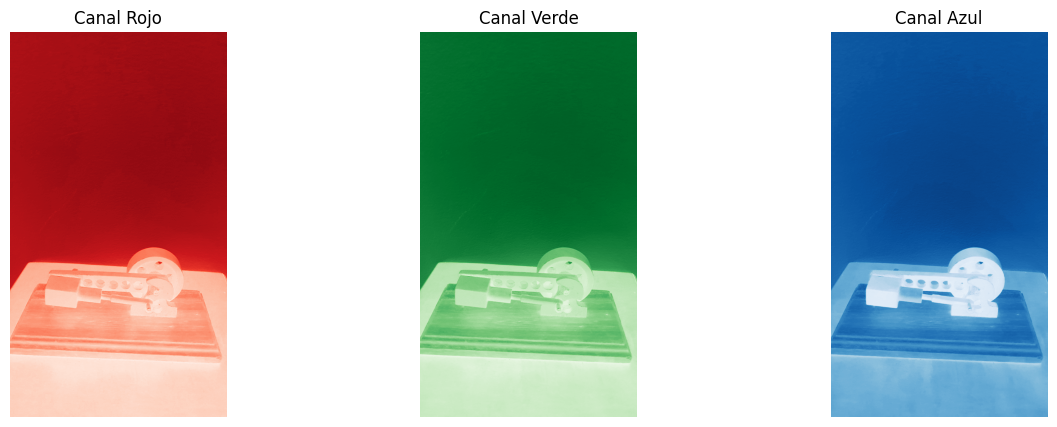

In [ ]:
# @title
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests
from io import BytesIO

# Función auxiliar para leer una imagen desde una URL con OpenCV
#def read_image_from_url(url):
   # response = requests.get(url)
  #  image = np.array(bytearray(response.content), dtype=np.uint8)
 #   image = cv2.imdecode(image, cv2.IMREAD_COLOR)  # Convertir bytes a imagen
#    return image

# URL de la imagen que deseas descargar
#image_url = "https://raw.githubusercontent.com/jpmanson/tuia-unr/main/images/big_buck_bunny.jpg"

# Leer la imagen
#image = read_image_from_url(image_url)

# OpenCV maneja imágenes en formato BGR, convertir a RGB
image_rgb = cv2.imread("/content/drive/MyDrive/Computer_vision/objeto_1.jpg", cv2.COLOR_BGR2RGB)

# Mostramos la información de la imagen
print(f"Shape de la imagen: {image_rgb.shape}.")
print(f"Columnas (Ancho): {image_rgb.shape[1]}")
print(f"Filas (Altura): {image_rgb.shape[0]}")
print(f"Canales: {image_rgb.shape[2]}")
print(f"Tipo de dato del array: {image_rgb.dtype}")

# Descomponer la imagen en los canales R, G, B
R, G, B = image_rgb[:,:,0], image_rgb[:,:,1], image_rgb[:,:,2]

# Mostrar cada canal de color
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(R, cmap='Reds')
axs[0].set_title('Canal Rojo')
axs[0].axis('off')

axs[1].imshow(G, cmap='Greens')
axs[1].set_title('Canal Verde')
axs[1].axis('off')

axs[2].imshow(B, cmap='Blues')
axs[2].set_title('Canal Azul')
axs[2].axis('off')

plt.show()

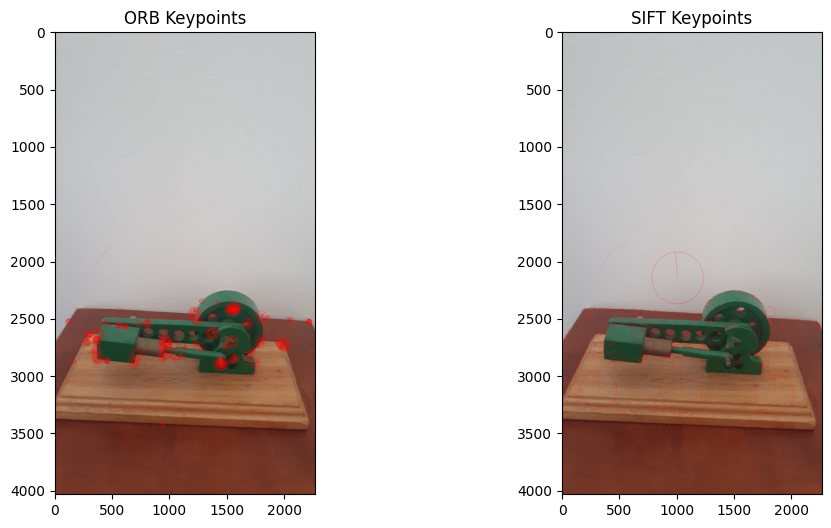

In [ ]:
input_image = cv2.imread("/content/drive/MyDrive/Computer_vision/objeto_1.jpg")

rgb_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

orb = cv2.ORB_create()
keypoints_orb = orb.detect(input_image, None)
image_with_orb_keypoints = cv2.drawKeypoints(rgb_image, keypoints_orb, None, color=(255, 0, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Inicializar SIFT
sift = cv2.SIFT_create()
keypoints_sift = sift.detect(input_image, None)
image_with_sift_keypoints = cv2.drawKeypoints(rgb_image, keypoints_sift, None, color=(255, 0, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Usar matplotlib para mostrar las imágenes
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image_with_orb_keypoints)
plt.title('ORB Keypoints')

plt.subplot(1, 2, 2)
plt.imshow(image_with_sift_keypoints)
plt.title('SIFT Keypoints')

plt.show()

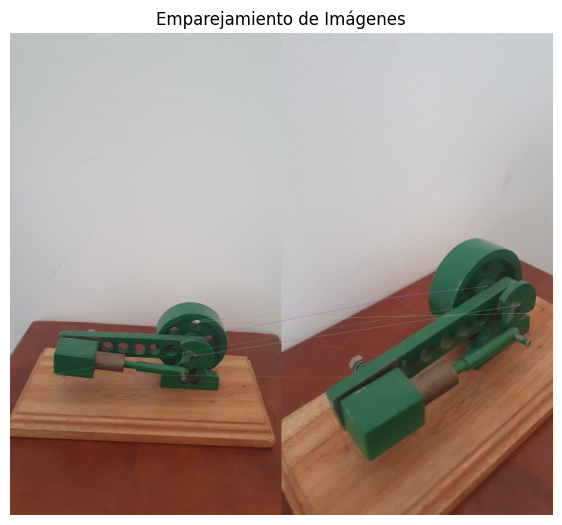

In [ ]:
# Cargar las imágenes
image1 = cv2.imread("/content/drive/MyDrive/Computer_vision/objeto_1.jpg")  # Reemplaza con la ruta a tu imagen
image2 = cv2.imread("/content/drive/MyDrive/Computer_vision/objeto_2.jpg")#, cv2.IMREAD_GRAYSCALE)  # Reemplaza con la ruta a otra imagen

# Inicializar ORB
orb = cv2.ORB_create()

# Detectar keypoints y calcular descriptores
keypoints1, descriptors1 = orb.detectAndCompute(image1, None)
keypoints2, descriptors2 = orb.detectAndCompute(image2, None)

# Crear un objeto BFMatcher para encontrar las coincidencias
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Encontrar coincidencias
matches = bf.match(descriptors1, descriptors2)

# Ordenar las coincidencias en orden de distancia (cuanto más baja, mejor)
matches = sorted(matches, key=lambda x:x.distance)

# Dibujar las primeras 15 coincidencias
matched_img = cv2.drawMatches(image1, keypoints1, image2, keypoints2, matches[:10], outImg=None, flags=2)

# Ajustar el tamaño de la figura de matplotlib
plt.figure(figsize=(7, 10))
plt.imshow(cv2.cvtColor(matched_img, cv2.COLOR_BGR2RGB))
plt.title('Emparejamiento de Imágenes')
plt.axis('off')
plt.show()

---
VIDEO
---

In [ ]:
!pip install pytube

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 2.5 MB/s eta 0:00:00


In [ ]:
from pytube import YouTube
from IPython.display import Video
from moviepy.editor import VideoFileClip

# URL del video de YouTube
url = 'https://www.youtube.com/watch?v=QAE3H7RsgwE'

# Descargar el video
yt = YouTube(url)
video = yt.streams.get_highest_resolution()
video.download(filename= "video_plaza.mp4")


'/content/video_plaza.mp4'

In [ ]:
# Recortar el video en un tiempo determinado (por ejemplo, de 26 a 36 segundos)
video_path = 'video_plaza.mp4'
output_path = 'video_recortado.mp4'

clip = VideoFileClip(video_path).subclip(26, 36)  # Recorta el video desde el segundo 10 al 20
clip_resized = clip.resize(height=480)  # Ajusta la altura a 480 píxeles
clip_resized.write_videofile(output_path)  # Guarda el video recortado

Video(output_path)

Moviepy - Building video video_recortado.mp4.
MoviePy - Writing audio in video_recortadoTEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video video_recortado.mp4



Moviepy - Done !
Moviepy - video ready video_recortado.mp4


In [ ]:
!ls

arco_triunfo.jpg  drive  sample_data  video_plaza.mp4  vide_recortado.mp4
